# Supplementary tables

______________

In [1]:
from analysis_utils import *

In the final analysis of the manuscript, we studied the FV RIN with the following specifications (please see the definition of the functions imported from the module `analysis_utils` and used below (and the respective explanation notebooks) to understand the meaning of each specification parameter).

In [2]:
prot = "7KVE_relaxed"
str_uni = "unidirectional"
unidirectional = True
str_inter = ""
filter_inter = False
path_data = "../data/igraph"

____________

### Supplementary Table 1: The FV network

This is the full RIN for FV, constructed with RINerator from the 3D structure of FV (7kve_clean).

Each amino acid is a node, and two residues are considered connected (there's an edge between them) if they are specially close.

As specified in the manuscript (and in the code), the final analysis was performed in an undirected (unidirectional), unweighted graph. Also, all interactions types and subtypes were considered without distinction. However, the code is flexible, allowing for different considerations, if desired.

Each row in the table corresponds to two residues which are connected by an edge (therefore, there are 4416 edges), according to the aforementioned criteria. The columns are:

- **Pos1**: The residue number (position) in the protein structure, for one of the two connected residues. The numbering starts at 1, with amino acid (legacy) Alanine (ALA);

- **Pos2**: The position number of the second interacting residue in the protein structure. The same numbering convention as described in Pos1 applies.

- **Res1**: Three letter code for the first residue.

- **Res2**: Three letter code for the second residue.

- **Inter_type**: Type of interaction between the two amino acids. Categorical levels and respective meaning are: 
    - cnt – Contact; 
    - ovl – Overlap;  
    - hbond – Hydrogen bond;
    - combi – Combination of more than one type.
    
- **Inter_subtype**: Subtype of the interaction between the two residues. Categorical levels and respective meaning are: 
    - mc_sc – main-chain and side-chain;
    - mc_mc – main-chain and main-chain;
    - sc_sc – side-chain and side-chain;
    - all_all – both subtypes in the same interaction.
    
- **N_ints**: Number of atomic interactions between the two amino acids, considering the main-chain and side-chain atoms.

- **Scores**: A score assigned by RINerator. Smaller values indicate closer proximity between the interacting atoms.

In [3]:
graph_data_path = os.path.join(path_data, 'out', f"{prot}_graph_data_{str_uni}{str_inter}.csv")

df_graph_data = pd.read_csv(graph_data_path)

# rename interactions
df_graph_data = df_graph_data.rename(columns={"inter1": "Inter_type", "inter2" : "Inter_subtype", "Nint" : "N_ints"})

df_graph_data = df_graph_data[['Pos1', 'Pos2', 'Res1', 'Res2', 'Inter_type', 'Inter_subtype', 'N_ints', 'Scores']]

df_graph_data

,Pos1,Pos2,Res1,Res2,Inter_type,Inter_subtype,N_ints,Scores
0,101,100,LEU,TYR,cnt,mc_mc,1,0.2811
1,100,102,TYR,ASP,cnt,mc_mc,3,1.1820
2,1854,100,TRP,TYR,cnt,sc_sc,1,0.0046
3,100,1855,TYR,LEU,cnt,sc_sc,11,4.7403
4,100,93,TYR,LYS,cnt,sc_sc,7,0.8906
...,...,...,...,...,...,...,...,...
4411,95,93,SER,LYS,cnt,mc_mc,1,0.0014
4412,94,95,LEU,SER,cnt,mc_sc,1,0.0030
4413,95,96,SER,GLU,cnt,mc_mc,1,0.0559
4414,97,96,GLY,GLU,cnt,mc_mc,2,0.4102


### Supplementary Table 2: Centrality measures

This is the table with the RIN nodes' centrality measures, calculated with iGraph, using the RIN constructed with RINerator. The RIN has 1374 nodes, and each row corresponds to one single node, and each node in the RIN is an amino acid, as aforementioned. The columns are:

- **node_pos**: The residue number (position) in the protein structure. The numbering starts at 1, with amino acid (legacy) Alanine (ALA);
- **residue**: Three-letter code for the amino acid name;
- **degree**: Node degree;
- **betweenness**: Normalized node betweenness;
- **closeness**: Normalized closeness value;
- **burt**: Node's Burt’s constraint;
- **authority**: Node's Page Rank centrality;
- **page_rank**: Node's authority score;
- **k_core**: Node's KCore value.

In [4]:
graph_features_path = os.path.join(path_data, 'out', f"{prot}_graph_features_{str_uni}{str_inter}.csv")

# ordering by node number
df_graph_features = pd.read_csv(graph_features_path).sort_values("node").reset_index(drop=True)

# bringing residue name (3 letter code)
df_graph_features = (df_graph_features.merge(df_graph_data[["Pos1", "Res1"]], 
                                             left_on="node", right_on="Pos1", how="left")
                                      .drop_duplicates()
                                      .merge(df_graph_data[["Pos2", "Res2"]], 
                                             left_on="node", right_on="Pos2", how="left")
                                      .drop_duplicates())

def get_res_name(row):
    
    res1, res2 = row[["Res1", "Res2"]]
    
    if res1 == res2:
        ans = res1
    else:
        if str(res1) == "nan":
            ans = res2
        elif str(res2) == "nan":
            ans = res1
        else:
            raise ValueError("error, at least one must be not null!")
    
    return ans

df_graph_features["residue"] = df_graph_features.apply(get_res_name, axis=1)

df_graph_features = df_graph_features[['node', 'residue', 
                                       'degree', 'betweenness', 'closeness', 'burt', 
                                       'authority', 'page_rank', 'k_core']]

df_graph_features = df_graph_features.rename(columns={"node" : "node_pos"})

df_graph_features

,node_pos,residue,degree,betweenness,closeness,burt,authority,page_rank,k_core
0,1,ALA,2,0.000000,0.101333,0.717156,0.003279,0.000327,2
1,2,GLN,4,302.107781,0.106536,0.447026,0.009277,0.000549,3
4,3,LEU,4,198.323676,0.105791,0.343918,0.016948,0.000499,3
5,4,ARG,7,5186.451604,0.113473,0.247603,0.040913,0.000718,5
8,5,GLN,5,212.111804,0.105733,0.320137,0.027655,0.000559,4
...,...,...,...,...,...,...,...,...,...
4446,2192,GLY,6,1298.266474,0.106503,0.257502,0.004232,0.000638,4
4450,2193,CYS,5,2345.700382,0.110948,0.313101,0.004451,0.000594,4
4453,2194,ASP,3,4489.166866,0.115731,0.422346,0.008873,0.000404,3
4454,2195,ILE,6,46433.174906,0.113313,0.238117,0.009030,0.000712,4


### Supplementary Table 3: Protein structure characteristics and conservation score

This table contains structural properties of the residues in FV. Each row represents one single residue, and the columns are:

- **pos_number**: The residue number (position) in the protein structure. The numbering starts at 1, with amino acid (legacy) Alanine (ALA);
- **kdhydro**: Residue's kdHydrophobicity; 
- **areaSAS**: Residue's solvent accessible surface area; 
- **areaSES**: Residue's solvent-excluded surface area; 
- **phi**: Residue's dihedral angle phi;
- **psi**: Residue's dihedral angle psi;
- **relSESA**: Residue's relative SESA, calculated by dividing the solvent-excluded area of the residue by the surface area of the same type of residue in a reference state (we considered the reference values of the 20 standard amino acids in Gly-X-Gly tripeptides).

The last column of the table contains:

- **conserv_score**: the residues' conservation score, obtained from the ConsurfDB webserver, using the FV protein structure in the search queries. Smaller values indicate higher conservation.

In [5]:
_, df_structure, df_conservation = read_all_data(prot = prot,
                                                 str_uni = str_uni, unidirectional = unidirectional,
                                                 str_inter = str_inter, filter_inter = filter_inter)

df_structure = df_structure.rename(columns={"number" : "pos_number"})
df_conservation = df_conservation.rename(columns={"SCORE" : "conserv_score"})

bring_only_consv = [' POS', 'conserv_score']
df_structure_conserv = df_structure.merge(df_conservation[bring_only_consv], left_on="pos_number", right_on=' POS')

df_structure_conserv = df_structure_conserv[['pos_number', 'kdhydro', 'areaSAS', 'areaSES',
                                             'phi', 'psi', 'relSESA', 'conserv_score']]

df_structure_conserv


Graph is simple (no loops or multiple edges)

Everythings all right with the number of features!


,pos_number,kdhydro,areaSAS,areaSES,phi,psi,relSESA,conserv_score
0,1,1.8,118.905756,76.732884,NaN,19.366263,1.256618,-0.920
1,2,-3.5,117.159662,90.606560,-87.122297,179.630234,0.850494,0.044
2,3,3.8,93.740826,71.567415,-124.233225,126.911211,0.676172,0.488
3,4,-4.5,27.318434,51.660390,-93.306445,83.491028,0.372744,-0.919
4,5,-3.5,90.983328,80.608504,-77.672464,134.422399,0.756646,-0.017
...,...,...,...,...,...,...,...,...
1369,2192,-0.4,0.264159,3.689824,-152.568955,-174.431206,0.078249,-0.764
1370,2193,2.5,3.580767,19.327387,-141.246474,136.715212,0.245833,-0.736
1371,2194,-3.5,87.684454,74.338482,-81.877278,82.908198,0.862976,-0.543
1372,2195,4.5,8.937951,33.975341,-79.990910,149.485776,0.322631,0.091


### Supplementary Table 5: Supervised dataset for the ML model

This is the dataset used for the construction of the machine learning model described in the manuscript. We used as features: the residues’ structural properties (given by Chimera); the centrality measures (given by iGraph) and the conservation score (given by the ConsurfDB webserver), totaling 14 features. The target was binary: 1 if a mutation in a given residue position in FV was observed; 0 otherwise. As can be seen, the dataset consists of $N=1317$ training observations. Indeed, that's less than the 1374 residues in the protein because some residues were deleted from the analysis:

**Nodes with zero betweenness**

We analyzed the whole RIN to identify and remove nodes with zero betweenness. That's important because we worled with log-betweenness as feature, so nodes with zero betweenness must be dropped. Also, such nodes are not physically important.

There are 48 nodes with zero betweenness: `[1, 14, 21, 24, 25, 50, 79, 101, 107, 128, 172, 178, 202, 302, 307, 338, 339, 382, 427, 434, 439, 450, 467, 511, 548, 570, 577, 641, 665, 676, 686, 697, 704, 712, 1536, 1538, 1599, 1601, 1893, 1916, 1926, 1955, 1957, 1975, 1994, 2064, 2116, 2143]`.

**Disconnected residues**

<div>
    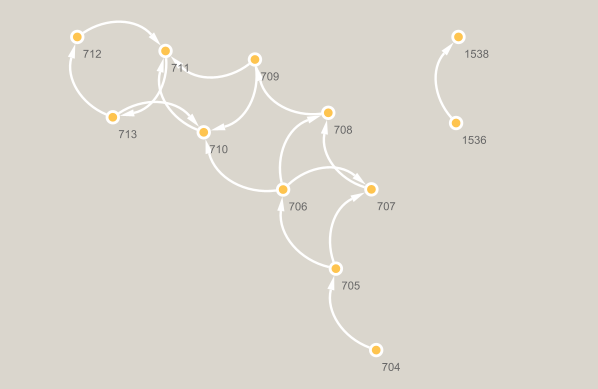
</div>

Also, there are some residues which are disconnected from the protein (due to errors in the crystallography/structure determination). There are 12 such residues, and they are: `[704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 1536, 1538]`. These residues are also deleted from the analysis.

Finally, the last residue (2196), has no value for the dihedral angle `psi`, which makes sense. To avoid issues with this missing value, this node is also deleted from the analysis (the first residue (1), has no value for `phi`, but it was already deleted for having 0 betweenness). 

Now, notice that the 4 residues `[704, 712, 1536, 1538]` are both disconnected and with zero betweennes. Thus, the total number of residues deleted from the analysis is: 48 + (12 - 4) + 1 = 57. And, indeed, 1374 - 57 = 1317, precisely the number of rows in the supervised dataset below.

As aformentioned, the columns of this table are a concatenation of the columns in the previous datasets, plus the aforementioned target.

In [6]:
df_final = pd.read_csv("../data/final_supervised_dataset_mutation.csv")

# renaming conservation score, to be consistent with previous table
df_final = df_final.rename(columns={"SCORE" : "conserv_score"})

df_final

,degree,closeness,burt,authority,page_rank,k_core,log_betweenness,kdhydro,areaSAS,areaSES,phi,psi,relSESA,conserv_score,mutation_observed
0,8,0.127149,0.169785,0.078069,0.000952,4,3.762787,-1.3,22.328001,40.026040,-149.752870,176.470040,0.305811,-0.841,0
1,5,0.120325,0.371672,0.032210,0.000604,4,3.056641,-3.5,0.755120,6.099975,-137.112742,10.152453,0.070813,-0.927,0
2,13,0.134619,0.145460,0.184694,0.001227,5,4.667178,-0.9,0.000000,0.000000,-106.196435,-179.849389,0.000000,-0.600,0
3,9,0.138468,0.182620,0.190232,0.000845,5,4.300639,3.8,4.659429,19.958945,-131.786922,127.704186,0.188573,-0.771,0
4,8,0.123123,0.205883,0.072800,0.000843,4,3.970037,-3.9,0.000000,0.000000,-78.234898,5.227656,0.000000,-0.906,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2,0.081953,0.500000,0.000010,0.000400,2,2.673914,-3.5,111.414286,110.551790,-132.270235,-40.612798,1.077818,3.285,0
1313,3,0.083318,0.431111,0.000023,0.000498,3,2.521021,1.8,65.757999,63.447933,-63.144475,143.459177,1.039057,1.152,0
1314,4,0.075927,0.482422,0.000007,0.000680,3,2.937207,-1.3,179.767780,127.060699,-54.727048,156.456221,0.970781,3.441,0
1315,4,0.075923,0.482422,0.000006,0.000682,3,2.694711,-1.3,156.317065,114.601624,-119.845535,-39.611308,0.875590,-0.507,0


___________
___________
___________
___________
___________
___________
___________
___________
___________
___________
___________
___________
